In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Contexte
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/

Cet ensemble de données provient de l'Institut national du diabète et des maladies digestives et rénales. L'objectif de l'ensemble de données est de prédire diagnostiquement si un patient souffre ou non de diabète, sur la base de certaines mesures diagnostiques incluses dans l'ensemble de données. Plusieurs contraintes ont été imposées sur la sélection de ces instances à partir d'une base de données plus grande. En particulier, tous les patients ici sont des femmes âgées d'au moins 21 ans et d'origine indienne Pima.

## Contenu des donnees
Les ensembles de données se composent de plusieurs variables prédictives médicales et d'une variable cible, le résultat. Les variables prédictives incluent le nombre de grossesses que la patiente a eu, son IMC, son taux d'insuline, son âge, etc.

### Importation des données

In [11]:
df = pd.read_csv('diabetes.csv')   

In [12]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [15]:
df.shape

(768, 9)

In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:title={'center':'Histogramme de la variable cible'}, ylabel='Frequency'>

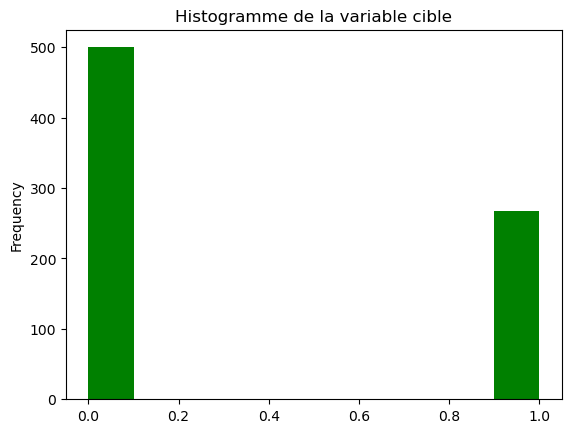

In [4]:
df.Outcome.plot(kind='hist', title='Histogramme de la variable cible', color='green')

In [17]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


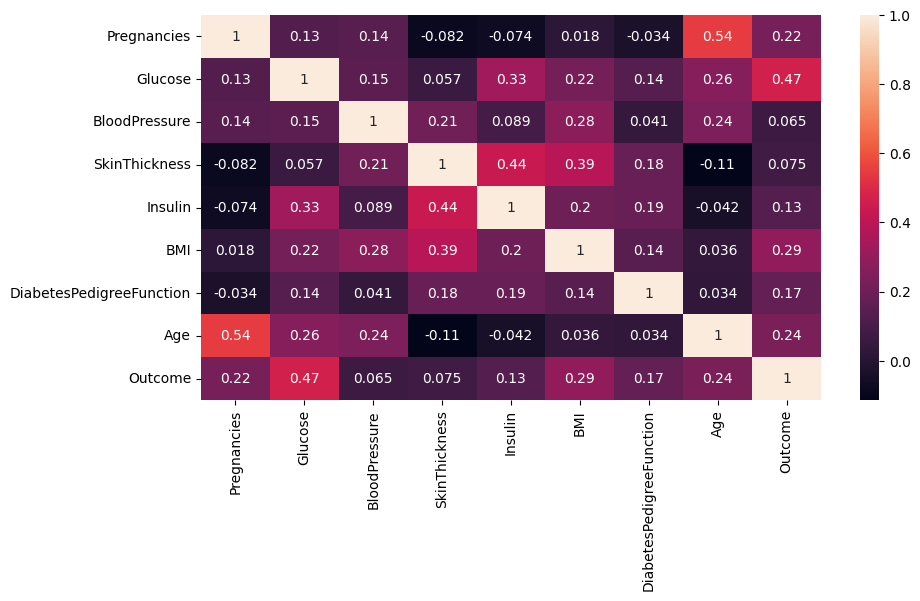

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Selecting Feature


In [5]:
X = df.drop(["Outcome"], axis=1) # Features
y = df.Outcome

In [20]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [7]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [8]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### Splitting Data

Pour comprendre les performances du modèle, diviser l'ensemble de données en un ensemble d'entraînement et un ensemble de test est une bonne stratégie.

Divisons l'ensemble de données en utilisant la fonction train_test_split(). Vous devez transmettre 3 paramètres : fonctionnalités, cible et taille test_set. De plus, vous pouvez utiliser random_state pour sélectionner des enregistrements de manière aléatoire.

In [9]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

##### Ici, l'ensemble de données est divisé en deux parties dans un rapport de 75:25. Cela signifie que 75 % des données seront utilisées pour la formation du modèle et 25 % pour les tests du modèle.

### Model Development and Prediction


#####  Tout d’abord, importez le module Logistic Regression et créez un objet classificateur de régression logistique à l’aide de la fonction LogisticRegression() avec random_state pour la reproductibilité.

#### Ensuite, ajustez votre modèle sur la rame à l'aide de fit() et effectuez une prédiction sur l'ensemble de test à l'aide de prédire().

In [22]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16 , max_iter=2000)

# fit the model with data
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=2000, random_state=16)

In [23]:
y_pred = logreg.predict(X_test)

In [21]:
logreg.coef_

array([[ 0.09102768,  0.03266234, -0.01411481,  0.00376788, -0.00156418,
         0.08847949,  0.78860547,  0.01339707]])

## Model Evaluation using Confusion Matrix

Une matrice de confusion est un tableau utilisé pour évaluer les performances d'un modèle de classification. Vous pouvez également visualiser les performances d'un algorithme. Le principe fondamental d'une matrice de confusion est le nombre de prédictions correctes et incorrectes résumées par classe.

In [11]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[116,   9],
       [ 25,  42]])

Ici, vous pouvez voir la matrice de confusion sous la forme d'un objet tableau. La dimension de cette matrice est 2*2 car ce modèle est une classification binaire. Vous disposez de deux classes 0 et 1. Les valeurs diagonales représentent des prédictions précises, tandis que les éléments non diagonaux sont des prédictions inexactes. Dans le résultat, 116 et 42 sont des prédictions réelles, et 25 et 9 sont des prédictions incorrectes.

Text(0.5, 427.9555555555555, 'Predicted label')

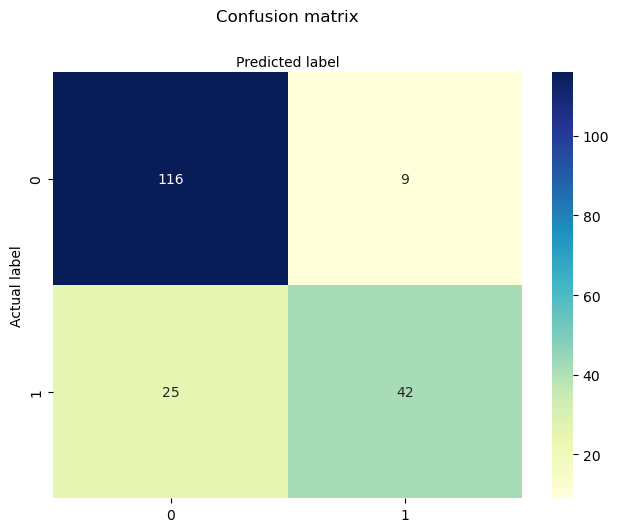

In [12]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [13]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       125
   with diabetes       0.82      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.82      0.78      0.79       192
    weighted avg       0.82      0.82      0.82       192



Eh bien, vous obtenez un taux de classification de 80 %, considéré comme une bonne précision.

Précision : la précision consiste à être précis, c'est-à-dire la précision de votre modèle. En d’autres termes, vous pouvez dire, lorsqu’un modèle fait une prédiction, à quelle fréquence elle est correcte. Dans votre cas de prédiction, lorsque votre modèle de régression logistique prédit que les patients souffriront de diabète, c'est le cas dans 73 % des cas.

Rappel : s'il y a des patients diabétiques dans l'ensemble de tests et que votre modèle de régression logistique peut l'identifier dans 57 % des cas.

# Application de la prediction sur un nouveau patient

In [24]:

# Demandez à l'utilisateur d'entrer les valeurs des caractéristiques
pregnancies = float(input("Entrez le nombre de grossesses : "))
glucose = float(input("Entrez le taux de glucose : "))
blood_pressure = float(input("Entrez la pression artérielle : "))
skin_thickness = float(input("Entrez l'épaisseur de la peau : "))
insulin = float(input("Entrez le taux d'insuline : "))
bmi = float(input("Entrez l'indice de masse corporelle (BMI) : "))
diabetes_pedigree = float(input("Entrez le facteur de prédisposition au diabète : "))
age = float(input("Entrez l'âge : "))

In [ ]:
features = np.array([[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree, age]])


In [ ]:
prediction = logreg.predict(features)


/home/herman/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
if prediction == 1:
    print("Vous êtes diabétique")
else:
    print("Vous n'êtes pas diabétique")

Vous êtes diabétique
